# Exploratory Data Analysis: Data Science Salaries

## Introduction

For this analysis, we are looking at different salaries of various employees in the field of Data Science. This dataset is already cleaned and ready for analysis, so we will focus mostly on EDA. 

There are many features in the dataset, like experience level, title, and employment type, as well as details about the company they work for, like country of company and remote ratio.

### Audience

Lets assume that our stakeholder for this analysis is an HR colleague who is trying to understand what factors impact salaries for Data Science roles. 

### Potential Business Questions

1. How do salaries vary by job title (e.g., data scientist, ML engineer, data analyst)?
3. What is the distribution of salaries across different experience levels?
4. How have data science salaries changed over time?
5. What is the correlation between remote ratio and salary?
6. How do salaries differ by location (e.g., employee country, company country)?

In [1]:
import numpy as np
import pandas as pd
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

data_filepath = "../input/data-science-salaries-2023/ds_salaries.csv"

salary_data = pd.read_csv(data_filepath)

salary_data.head()

Setup Complete


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [2]:
# Define the order of experience levels
def categorize_experience(exp):
    exp = exp.lower() if pd.notna(exp) else ""
    if "en" in exp:
        return "Entry-Level"
    elif "mi" in exp:
        return "Mid-Level"
    elif "se" in exp:
        return "Senior"
    elif "ex" in exp:
        return "Executive"
    else:
        return "Other"

salary_data['experience_category'] = salary_data['experience_level'].apply(categorize_experience)

experience_order = ["Entry-Level", "Mid-Level", "Senior", "Executive"]

salary_data['experience_category'] = pd.Categorical(salary_data['experience_category'], categories=experience_order, ordered=True)

# Group job titles into most common categories

def categorize_job(title):
    title = title.lower() if pd.notna(title) else ""
    if "data scientist" in title:
        return "Data Scientist"
    elif "data engineer" in title:
        return "Data Engineer"
    elif "data analyst" in title:
        return "Data Analyst"
    elif "AI Engineer" or "ML Engineer" in title:
        return "AI/ML Engineer"
    else:
        return "Other"

salary_data['job_category'] = salary_data['job_title'].apply(categorize_job)

salary_data.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_category,job_category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Senior,Data Scientist
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Mid-Level,AI/ML Engineer
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Mid-Level,AI/ML Engineer
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Senior,Data Scientist
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Senior,Data Scientist


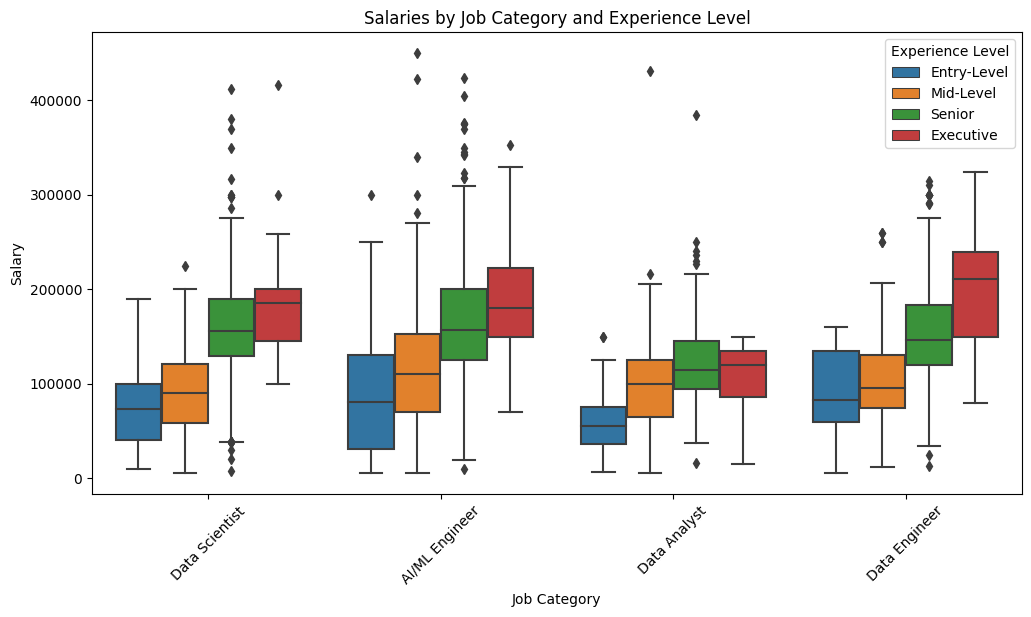

In [3]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=salary_data, x='job_category', y='salary_in_usd', hue='experience_category')

plt.xticks(rotation=45)
plt.title("Salaries by Job Category and Experience Level")
plt.xlabel("Job Category")
plt.ylabel("Salary")
plt.legend(title="Experience Level")
plt.show()